In [4]:
# http://holoviews.org/user_guide/Composing_Elements.html

In [1]:
require 'red-visualizer'

rdv = RdvMain.new(Rdv::Matplot.notebook)

#<RedVisualizer::Main:0x00007f8677771d20 @frontend=#<RedVisualizer::Matplot:0x00007f8677771d48 @plot=<module 'matplotlib.pyplot' from '/Users/youchan/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>>>

In [2]:
curve = rdv.curve do
  function {|x| Math.sin(x) }
  range x: 0..10, y: -1..1
end
nil

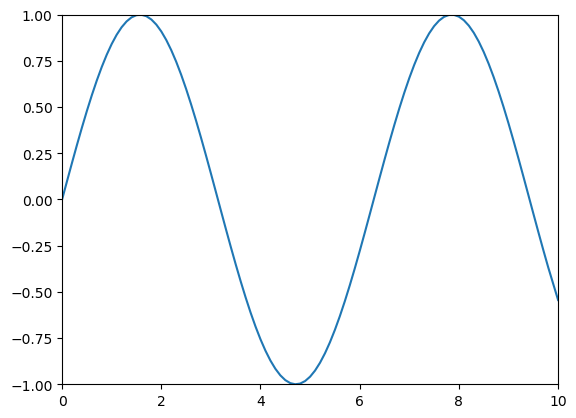

In [3]:
curve.render

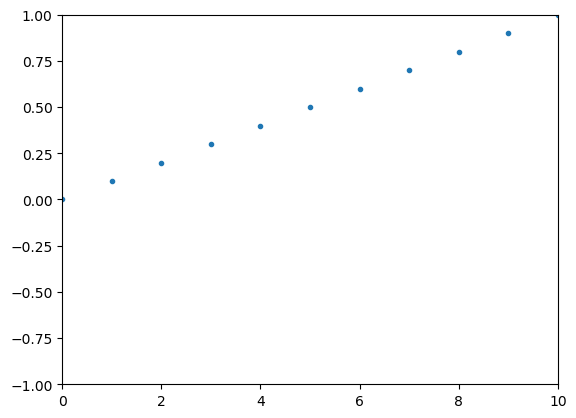

In [3]:
scatter = rdv.scatter do
  series 0..10, (0..1).step(0.1)
  range x: 0..10, y: -1..1
end

scatter.render

In [4]:
layout = rdv.layout

#<RedVisualizer::Layout:0x00007f86777bdf40 @frontend=#<RedVisualizer::Matplot:0x00007f8677771d48 @plot=<module 'matplotlib.pyplot' from '/Users/youchan/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>, @series=#<struct RedVisualizer::Series xs=0..10, ys=#<Enumerator: 0..1:step(0.1)>>>, @layout=#<RedVisualizer::ArrayLayout:0x00007f86777bdf18 @array=[], @direction=:horizontal>>

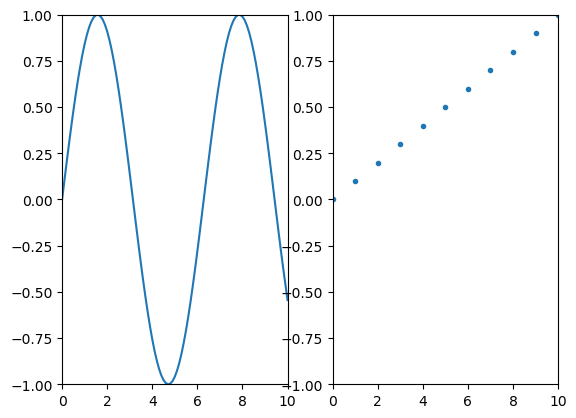

In [5]:
layout << curve
layout << scatter
layout.render

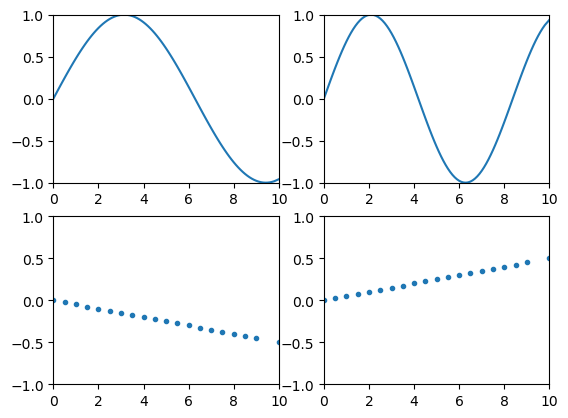

In [6]:
curve_list = [0.5, 0.75].map do |f|
  rdv.curve(f:f) do
    function {|x| Math.sin(f*x) }
    range x: 0..10, y: -1..1
  end
end

scatter_list = [-0.5, 0.5].map do |f|
   rdv.scatter(f: f) do
    series Rdv::Linspace.new(0..10, 20), Rdv::Linspace.new(0..f, 20)
    range x: 0..10, y: -1..1
  end
end

grid_layout = rdv.layout(:grid2x2)
grid_layout << curve_list
grid_layout << scatter_list
grid_layout.render